In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
agg = pd.read_csv('AGG.csv',index_col='Date',parse_dates=True)['Adj Close']
#jnk = pd.read_csv('JNK.csv',index_col='Date',parse_dates=True)['Adj Close']
spy = pd.read_csv('SPY.csv',index_col='Date',parse_dates=True)['Adj Close']
tlt = pd.read_csv('TLT.csv',index_col='Date',parse_dates=True)['Adj Close']
stocks = pd.concat([agg,spy,tlt],axis=1)
stocks.columns = ['agg','spy','tlt']

In [140]:
stocks.head()

,agg,spy,tlt
Date,,,
2018-03-20,103.252518,265.793518,115.768562
2018-03-21,103.242813,265.283417,115.895088
2018-03-22,103.436874,258.652069,117.043533
2018-03-23,103.436874,253.138992,116.955925
2018-03-26,103.398041,260.064667,116.508247


In [141]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

agg    0.000170
spy    0.000282
tlt    0.000223
dtype: float64

In [142]:
stocks.pct_change(1).corr()

,agg,spy,tlt
agg,1.000000,-0.169507,0.884363
spy,-0.169507,1.000000,-0.358266
tlt,0.884363,-0.358266,1.000000


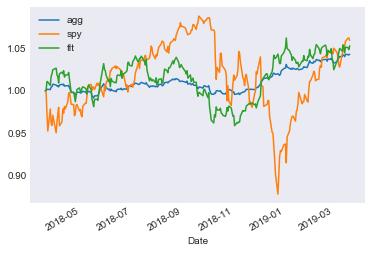

In [143]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [144]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,agg,spy,tlt
Date,,,
2018-03-20,NaN,NaN,NaN
2018-03-21,-0.000094,-0.001919,0.001093
2018-03-22,0.001880,-0.024997,0.009909
2018-03-23,0.000000,-0.021315,-0.000749
2018-03-26,-0.000375,0.027359,-0.003828


In [145]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,agg,spy,tlt
Date,,,
2018-03-20,NaN,NaN,NaN
2018-03-21,-0.000094,-0.001921,0.001092
2018-03-22,0.001878,-0.025315,0.009861
2018-03-23,0.000000,-0.021545,-0.000749
2018-03-26,-0.000375,0.026992,-0.003835


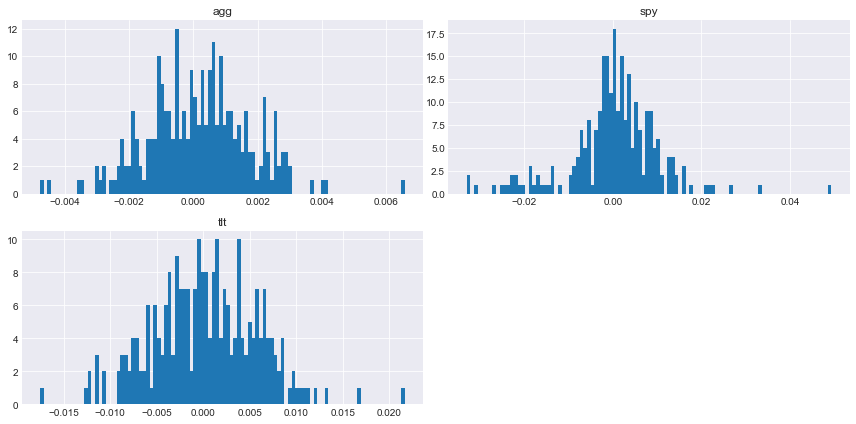

In [146]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [147]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
agg,251.0,0.000168,0.001590,-0.004757,-0.000941,0.000189,0.001179,0.006574
spy,251.0,0.000231,0.010093,-0.032939,-0.003432,0.000483,0.005422,0.049290
tlt,251.0,0.000207,0.005621,-0.017524,-0.003466,0.000167,0.003935,0.021666


In [148]:
log_ret.mean() * 252

agg    0.042454
spy    0.058176
tlt    0.052144
dtype: float64

In [149]:
log_ret.cov()*252 # multiply by days

,agg,spy,tlt
agg,0.000637,-0.000687,0.001992
spy,-0.000687,0.025668,-0.005119
tlt,0.001992,-0.005119,0.007962


In [152]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(3))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['agg', 'spy', 'tlt'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423]


Rebalance to sum to 1.0
[0.46291341 0.51156154 0.02552505]


Expected Portfolio Return
0.05074407380224146


Expected Volatility
0.0802919905978238


Sharpe Ratio
0.6319942179091622


In [154]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(3))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [155]:
sharpe_arr.max()

1.7851661215844428

In [156]:
sharpe_arr.argmax()

5104

In [157]:
all_weights[1419,:]

array([0.43329029, 0.29988607, 0.26682363])

In [158]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

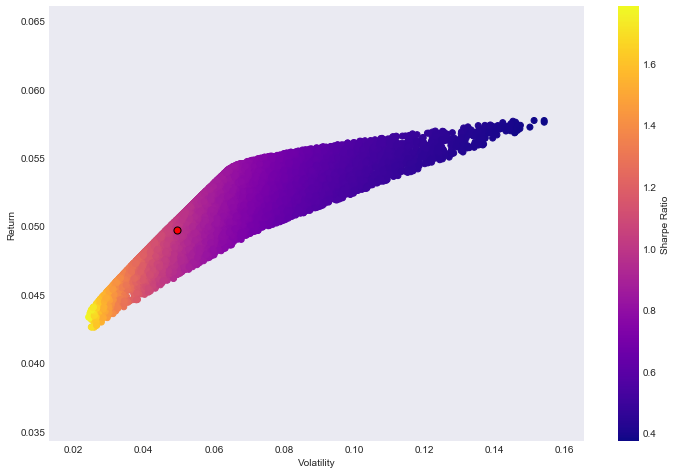

In [159]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [160]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [161]:
from scipy.optimize import minimize

In [162]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [163]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [164]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [165]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [166]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [167]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

In [130]:
opt_results

     fun: -1.3770313519624016
     jac: array([ 9.29315209e-01, -2.95773149e-04,  1.33665536e+00,  7.43746758e-04])
 message: 'Optimization terminated successfully.'
    nfev: 31
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.38465859e-16, 7.15462224e-01, 0.00000000e+00, 2.84537776e-01])

In [131]:
opt_results.x

array([1.38465859e-16, 7.15462224e-01, 0.00000000e+00, 2.84537776e-01])

In [132]:
get_ret_vol_sr(opt_results.x)

array([0.05254798, 0.03816034, 1.37703135])

In [133]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) # Change 100 to a lower number for slower computers!

In [134]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1]

In [135]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

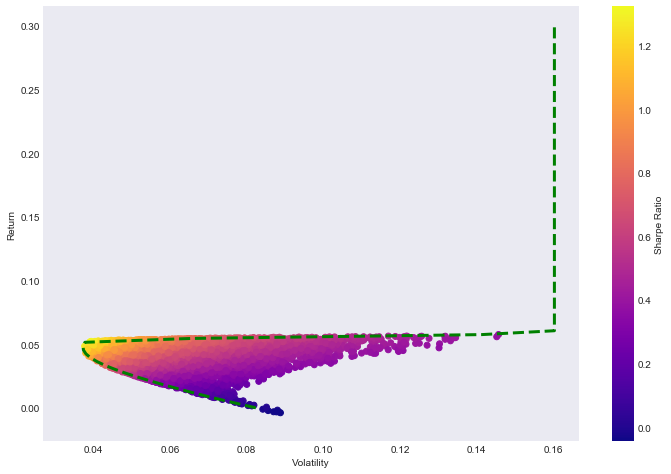

In [136]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)